# Customer Service Requests Analysis

In [100]:
# importing required libraries
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy import stats

# Task 1
**1. Import a 311 NYC service request.**

In [101]:
#importing the original data file
service311_original=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\amita\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [102]:
#checking the original data file information, shape and other details
service311_original.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [103]:
service311_original.shape

(300698, 53)

In [104]:
service311_original.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [105]:
service311_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [106]:
# creating the backup of the original file to perform analysis
analysed_service311=service311_original

In [107]:
# checking the backup file's info to ensure the integrity of the data file
analysed_service311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [108]:
analysed_service311.shape

(300698, 53)

In [109]:
analysed_service311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

*---Performing useful EDA on the data file ---*

In [110]:
# checking for the null values
analysed_service311.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [111]:
# checking the dimension of the data file
analysed_service311.ndim

2

*Since our data file is a 2-D data file or a DataFrame, we can use Heatmap to analyse the missing values easily as our data file have large number of columns available, so using graphical representation will be useful*

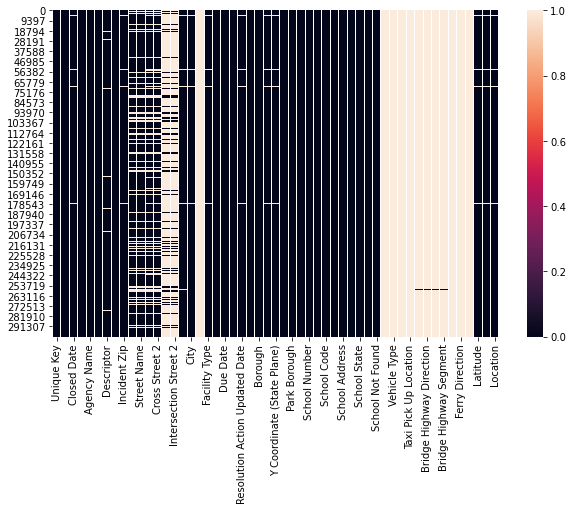

In [112]:
# plotting a heatmap to check for the empty columns
plt.figure(figsize=(10,6))
sns.heatmap(analysed_service311.isna())
plt.show()

In [113]:
# Now, Cleaning the data and disregarding unwanted and empty columns of analaysed_service311

clean_analysed_service311=analysed_service311[["Created Date", "Closed Date", "Agency Name", "Complaint Type",
       "Descriptor", "Location Type", "Incident Zip", "Incident Address",
       "Street Name", "Address Type", "City", "Status", "Due Date",
       "Resolution Description", "Resolution Action Updated Date",
       "Community Board", "Borough", "Park Borough", "Latitude", "Longitude"]]

In [114]:
# checking the shape of the cleaned data
clean_analysed_service311.shape

(300698, 20)

In [115]:
clean_analysed_service311.head()

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Park Borough,Latitude,Longitude
0,12/31/2015 11:59:45 PM,01-01-16 0:55,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ADDRESS,NEW YORK,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,MANHATTAN,40.865682,-73.923501
1,12/31/2015 11:59:44 PM,01-01-16 1:26,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,ADDRESS,ASTORIA,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,QUEENS,40.775945,-73.915094
2,12/31/2015 11:59:29 PM,01-01-16 4:51,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,ADDRESS,BRONX,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,BRONX,40.870325,-73.888525
3,12/31/2015 11:57:46 PM,01-01-16 7:43,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,ADDRESS,BRONX,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,BRONX,40.835994,-73.828379
4,12/31/2015 11:56:58 PM,01-01-16 3:24,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,ADDRESS,ELMHURST,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,QUEENS,40.733060,-73.874170


In [116]:
# checking the integrity of the cleaned data
clean_analysed_service311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Created Date                    300698 non-null  object 
 1   Closed Date                     298534 non-null  object 
 2   Agency Name                     300698 non-null  object 
 3   Complaint Type                  300698 non-null  object 
 4   Descriptor                      294784 non-null  object 
 5   Location Type                   300567 non-null  object 
 6   Incident Zip                    298083 non-null  float64
 7   Incident Address                256288 non-null  object 
 8   Street Name                     256288 non-null  object 
 9   Address Type                    297883 non-null  object 
 10  City                            298084 non-null  object 
 11  Status                          300698 non-null  object 
 12  Due Date        

In [117]:
#checking the dimension of the cleaned data
clean_analysed_service311.ndim

2

In [118]:
# checking for the null values in the cleaned data
clean_analysed_service311.isna().sum()

Created Date                          0
Closed Date                        2164
Agency Name                           0
Complaint Type                        0
Descriptor                         5914
Location Type                       131
Incident Zip                       2615
Incident Address                  44410
Street Name                       44410
Address Type                       2815
City                               2614
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2187
Community Board                       0
Borough                               0
Park Borough                          0
Latitude                           3540
Longitude                          3540
dtype: int64

# Task 2
**2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)**

In [119]:
# converting the existing columns of 'Created Date' and 'Closed Date' into Datetime object type
clean_analysed_service311["Created Date"] = pd.to_datetime(clean_analysed_service311["Created Date"])
clean_analysed_service311["Closed Date"] = pd.to_datetime(clean_analysed_service311["Closed Date"])

<ipython-input-119-453db5f099a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_analysed_service311["Created Date"] = pd.to_datetime(clean_analysed_service311["Created Date"])
<ipython-input-119-453db5f099a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_analysed_service311["Closed Date"] = pd.to_datetime(clean_analysed_service311["Closed Date"])


In [120]:
# verifying the changes occur or not
clean_analysed_service311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Created Date                    300698 non-null  datetime64[ns]
 1   Closed Date                     298534 non-null  datetime64[ns]
 2   Agency Name                     300698 non-null  object        
 3   Complaint Type                  300698 non-null  object        
 4   Descriptor                      294784 non-null  object        
 5   Location Type                   300567 non-null  object        
 6   Incident Zip                    298083 non-null  float64       
 7   Incident Address                256288 non-null  object        
 8   Street Name                     256288 non-null  object        
 9   Address Type                    297883 non-null  object        
 10  City                            298084 non-null  object 

In [121]:
# checking the first 5 values of the newly converted columns
clean_analysed_service311["Created Date"].head()

0   2015-12-31 23:59:45
1   2015-12-31 23:59:44
2   2015-12-31 23:59:29
3   2015-12-31 23:57:46
4   2015-12-31 23:56:58
Name: Created Date, dtype: datetime64[ns]

In [122]:
clean_analysed_service311["Closed Date"]

0        2016-01-01 00:55:00
1        2016-01-01 01:26:00
2        2016-01-01 04:51:00
3        2016-01-01 07:43:00
4        2016-01-01 03:24:00
                 ...        
300693                   NaT
300694   2015-03-29 02:33:59
300695   2015-03-29 03:40:20
300696   2015-03-29 04:38:35
300697   2015-03-29 04:41:50
Name: Closed Date, Length: 300698, dtype: datetime64[ns]

In [123]:
# creating a new column 'Request_Closing_Time' which holds the entries of the time taken in closing of the complaints
clean_analysed_service311["Request_Closing_Time"] = clean_analysed_service311["Closed Date"]-clean_analysed_service311["Created Date"] 

<ipython-input-123-03ddfa86ae4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_analysed_service311["Request_Closing_Time"] = clean_analysed_service311["Closed Date"]-clean_analysed_service311["Created Date"]


In [124]:
# checking if the new column is added or not
clean_analysed_service311.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Address Type', 'City', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'Park Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')

In [125]:
# checking the datatype of the newly created column
clean_analysed_service311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Created Date                    300698 non-null  datetime64[ns] 
 1   Closed Date                     298534 non-null  datetime64[ns] 
 2   Agency Name                     300698 non-null  object         
 3   Complaint Type                  300698 non-null  object         
 4   Descriptor                      294784 non-null  object         
 5   Location Type                   300567 non-null  object         
 6   Incident Zip                    298083 non-null  float64        
 7   Incident Address                256288 non-null  object         
 8   Street Name                     256288 non-null  object         
 9   Address Type                    297883 non-null  object         
 10  City                            298084 non-n

In [126]:
# viewing the first 5 values of the newly created column
clean_analysed_service311["Request_Closing_Time"].head()

0   0 days 00:55:15
1   0 days 01:26:16
2   0 days 04:51:31
3   0 days 07:45:14
4   0 days 03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [127]:
# creating another column of Created hour of the complaints for further analysis
clean_analysed_service311["Created_Hour"] = clean_analysed_service311["Created Date"].apply(lambda x:x.hour)

<ipython-input-127-a141af6c3c91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_analysed_service311["Created_Hour"] = clean_analysed_service311["Created Date"].apply(lambda x:x.hour)


In [128]:
# creating another column of Closed hour of the complaints for further analysis
clean_analysed_service311["Closed_Hour"] = clean_analysed_service311["Closed Date"].apply(lambda x:x.hour)

<ipython-input-128-a1f0aa493c22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_analysed_service311["Closed_Hour"] = clean_analysed_service311["Closed Date"].apply(lambda x:x.hour)


In [129]:
# creating a column to analyse How many hours were required to close a complaint
clean_analysed_service311["Request_Closing_Time_Hour"] = clean_analysed_service311["Request_Closing_Time"].apply(lambda x:x/np.timedelta64(1, 'h'))

<ipython-input-129-ca08c1669973>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_analysed_service311["Request_Closing_Time_Hour"] = clean_analysed_service311["Request_Closing_Time"].apply(lambda x:x/np.timedelta64(1, 'h'))


In [130]:
# Checking if the changes made occur or not
clean_analysed_service311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Created Date                    300698 non-null  datetime64[ns] 
 1   Closed Date                     298534 non-null  datetime64[ns] 
 2   Agency Name                     300698 non-null  object         
 3   Complaint Type                  300698 non-null  object         
 4   Descriptor                      294784 non-null  object         
 5   Location Type                   300567 non-null  object         
 6   Incident Zip                    298083 non-null  float64        
 7   Incident Address                256288 non-null  object         
 8   Street Name                     256288 non-null  object         
 9   Address Type                    297883 non-null  object         
 10  City                            298084 non-n

In [131]:
#Checking all the Columns to make sure that all the new columns were added
clean_analysed_service311.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Address Type', 'City', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'Park Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time', 'Created_Hour', 'Closed_Hour',
       'Request_Closing_Time_Hour'],
      dtype='object')

# Task 3
**3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.**

In [132]:
# checking the different categories of the 'Complaint Type'
clean_analysed_service311["Complaint Type"].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [133]:
# checking the different categories of the 'Descriptor'
clean_analysed_service311["Descriptor"].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant', 'Homeless

In [134]:
# grouping the total complaints of different types of complaints according to cities
complaintTypecity = pd.DataFrame({'count':
                                  clean_analysed_service311.groupby(["Complaint Type","City"]).size()}).reset_index()
complaintTypecity

,Complaint Type,City,count
0,Animal Abuse,ARVERNE,38
1,Animal Abuse,ASTORIA,125
2,Animal Abuse,BAYSIDE,37
3,Animal Abuse,BELLEROSE,7
4,Animal Abuse,BREEZY POINT,2
...,...,...,...
759,Vending,STATEN ISLAND,25
760,Vending,SUNNYSIDE,15
761,Vending,WHITESTONE,1
762,Vending,WOODHAVEN,6


In [135]:
# grouping total no. of Complaint types according to 'Borough', 'Descriptor'
clean_analysed_service311.groupby(['Borough','Complaint Type','Descriptor']).size()

Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      132
                                    In Car                        36
                                    Neglected                    673
                                    No Shelter                    71
                                    Other (complaint details)    311
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 11
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 288, dtype: int64

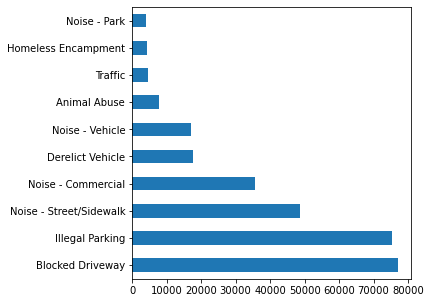

In [136]:
#Complaint type Breakdown with bar plot to figure out majority of complaint types and top 10 complaints
clean_analysed_service311["Complaint Type"].value_counts().head(10).plot(kind='barh',figsize=(5,5));

*From the above Graphical Representation, we can give **2-Major Insights**---*
 **1) 'Blocked Driveway'** is the most frequent Complaint among all **'Complaint Types'** and **2) 'Noise-Park'** is the Least, and what else are the top 10 complaint types*

In [137]:
# Removing all the Null Values from the 'Complaint Type' Column and storing it in a different variable
majorcomplints=clean_analysed_service311.dropna(subset=["Complaint Type"])

# Grouping Non-Null 'Complaint Type'
majorcomplints=clean_analysed_service311.groupby("Complaint Type")

# Sorting the grouped 'Complaint Type' on the number of 'Complaints' in Descending Order by using the 'size()' before using 'sort_values()'
sortedComplaintType = majorcomplints.size().sort_values(ascending = False)

# Updating the sorted variable to display the 'count' of all the 'Complaint Type'
sortedComplaintType = sortedComplaintType.to_frame('count').reset_index()

# Printing the top 10 'Complaint Types'
sortedComplaintType.head(10)

,Complaint Type,count
0,Blocked Driveway,77044
1,Illegal Parking,75361
2,Noise - Street/Sidewalk,48612
3,Noise - Commercial,35577
4,Derelict Vehicle,17718
5,Noise - Vehicle,17083
6,Animal Abuse,7778
7,Traffic,4498
8,Homeless Encampment,4416
9,Noise - Park,4042


*By executing abvove code we can verify that our graphical representation of top 10 complaints was correct*

**3rd Insight -- which 'Complaint Types' have how much contribution in the top 5 Complaint Types**

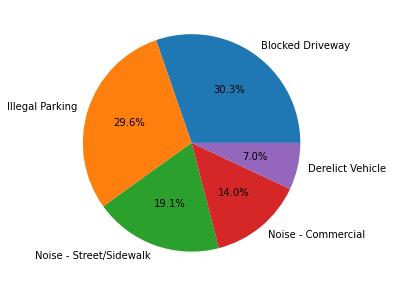

In [138]:
# figuring out which 'Complaint Type' has how much of the contribution of top 5 complaints
sortedComplaintType = sortedComplaintType.head()
plt.figure(figsize=(5,5))
plt.pie(sortedComplaintType['count'],labels=sortedComplaintType["Complaint Type"], autopct="%1.1f%%")
plt.show()

<AxesSubplot:ylabel='City'>

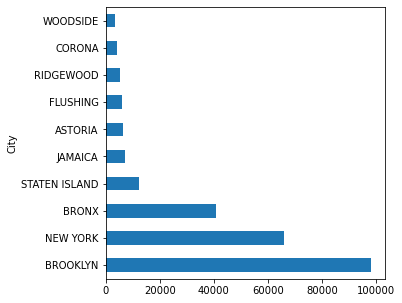

In [139]:
# Plotting the top 10 cities with most number of Complaints


# Below there are two different methods used to print the bar plot but since I used the first kind above, I decided to print the barplot using different method by using 'groupby' to plot the bar plot this time

# clean_analysed_service311["City"].value_counts().head(10).plot(kind='barh',figsize=(5,5)) --->> This code also works and gives the same result
clean_analysed_service311.groupby(["City"]).size().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(5,5))

**Major Insight 3, Most Unsafe city is - "BROOKLYN"**

C:\Users\amita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


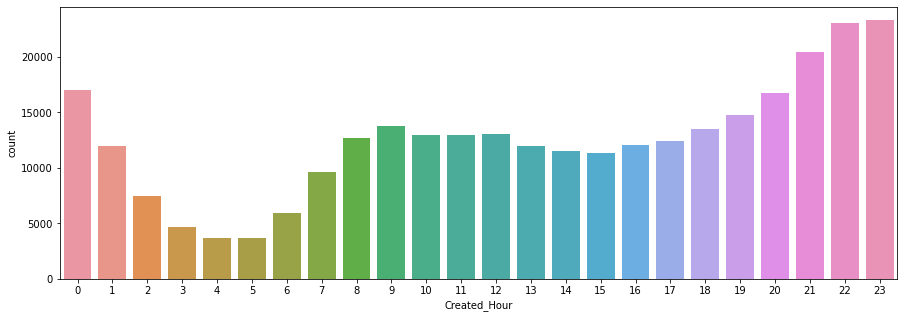

In [140]:
# plotting a graph to identify in which Hour the most no. of Complaints were Recoreded.
plt.figure(figsize=(15,5))
sns.countplot(clean_analysed_service311["Created_Hour"])
plt.show()

**Major Insight 4, 23hrs(11 PM) is the most Unsafest Hour**

<AxesSubplot:>

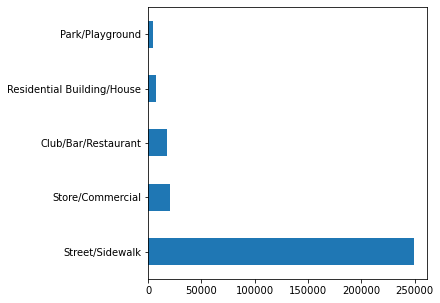

In [141]:
# Plotting a bar plot to see the top 5 Location type that have been reported the most
clean_analysed_service311["Location Type"].value_counts().head().plot(kind='barh',figsize=(5,5))

**Major Insight 5, Most of the Complaints are for the Street/Sidewalk. Therefore, Street/Sidewalk is the most Dangerous among all the Location Types**

<AxesSubplot:>

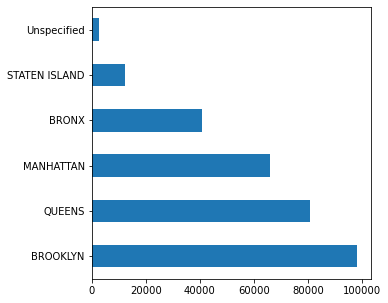

In [142]:
# plotting a Bar Plot to check which borough has most Complaints
clean_analysed_service311["Borough"].value_counts().plot(kind='barh',figsize=(5,5))

**Major Insight 6, Most of the Complaints are from the 'BROOKLYN' Borough. Therefore, 'BROOKLYN' is the most Dangerous among all the Boroughs**

C:\Users\amita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


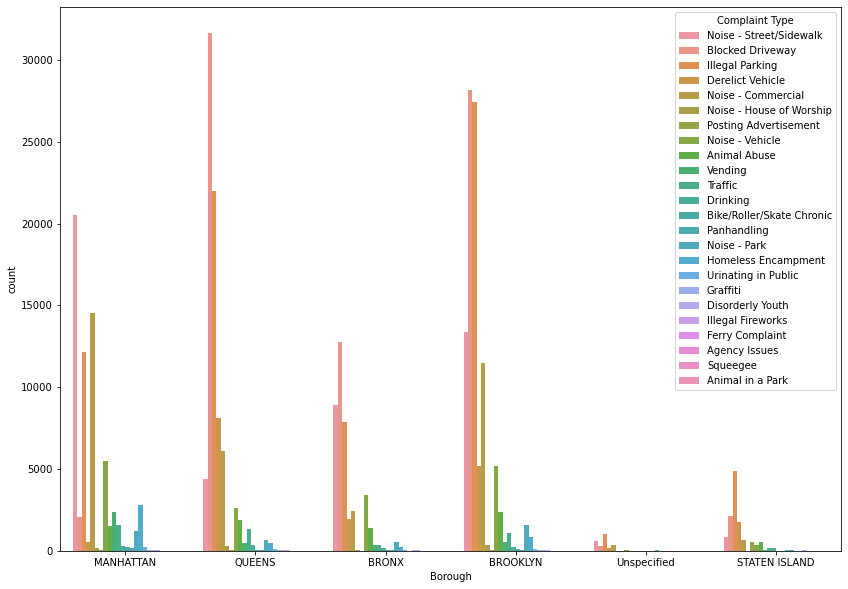

In [143]:
# Plotting a CountPlot to see the frequency of different 'Complaint Type' based on 'Borough'

plt.figure(figsize=(14,10))
sns.countplot("Borough",data=clean_analysed_service311,hue="Complaint Type")
plt.show()

**Major Insight 7, MANHATTAN have the least Blocked Driveway Problem among the top 4 Boroughs(MANHATTAN,QUEENS,BRONX and BROOKLYN) in Complaints.**

# Task 4

**4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.**

In [144]:
# Grouping by 'Complaint Type' and 'Location Type'
Ordered_Complaints_Types=clean_analysed_service311.groupby(["Complaint Type","Location Type"])

In [145]:
# Ordering the 'Complaint Type' based on average 'Request_Closing_Time' based on 'Location Type'
Ordered_Complaints_Types['Request_Closing_Time_Hour'].mean()

Complaint Type       Location Type             
Animal Abuse         Commercial                    5.342769
                     House and Store               5.013262
                     Park/Playground               3.702493
                     Parking Lot                   5.540399
                     Residential Building          4.818166
                                                     ...   
Urinating in Public  Subway Station                1.152130
Vending              Park/Playground               3.467124
                     Residential Building/House    4.197084
                     Store/Commercial              3.973838
                     Street/Sidewalk               4.026692
Name: Request_Closing_Time_Hour, Length: 71, dtype: float64

# Task 5
**Perform a statistical test for the following:**

**a) Whether the average response time across complaint types is similar or not (overall)**

**b) Are the type of complaint or service requested and location related?**

**a) Whether the average response time across complaint types is similar or not (overall)**

*H0: Avg response time is same across complaint types*

*H1: Avg response time is not same across complaint types*

In [146]:
# checking for the null values
clean_analysed_service311.isna().sum()

Created Date                          0
Closed Date                        2164
Agency Name                           0
Complaint Type                        0
Descriptor                         5914
Location Type                       131
Incident Zip                       2615
Incident Address                  44410
Street Name                       44410
Address Type                       2815
City                               2614
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2187
Community Board                       0
Borough                               0
Park Borough                          0
Latitude                           3540
Longitude                          3540
Request_Closing_Time               2164
Created_Hour                          0
Closed_Hour                        2164
Request_Closing_Time_Hour          2164
dtype: int64

In [147]:
# Dropping the null values in the 'Location Type' column, as the Column 'Complaint Type' does not have any null values
clean_analysed_service311=clean_analysed_service311.dropna(subset=["Location Type"])

In [148]:
# Dropping the null values in the 'Request_Closing_Time_Hour' column
clean_analysed_service311=clean_analysed_service311.dropna(subset=["Request_Closing_Time_Hour"])

In [149]:
#  Checking for the null values again
clean_analysed_service311.isna().sum()

Created Date                          0
Closed Date                           0
Agency Name                           0
Complaint Type                        0
Descriptor                         5899
Location Type                         0
Incident Zip                        501
Incident Address                  44371
Street Name                       44371
Address Type                        701
City                                500
Status                                0
Due Date                              0
Resolution Description                0
Resolution Action Updated Date        2
Community Board                       0
Borough                               0
Park Borough                          0
Latitude                           1426
Longitude                          1426
Request_Closing_Time                  0
Created_Hour                          0
Closed_Hour                           0
Request_Closing_Time_Hour             0
dtype: int64

In [150]:
# Checking the top 5 Complaints
clean_analysed_service311["Complaint Type"].value_counts().head()

Blocked Driveway           76773
Illegal Parking            74497
Noise - Street/Sidewalk    48067
Noise - Commercial         35242
Derelict Vehicle           17580
Name: Complaint Type, dtype: int64

In [151]:
# Grouping the top 5 Complaints along with it's 'Request_Closing_Time' using 'loc' method
Blocked_Driveway_loc=clean_analysed_service311.loc[ clean_analysed_service311["Complaint Type"]=="Blocked Driveway", ["Request_Closing_Time_Hour"] ]
Blocked_Driveway_loc

,Request_Closing_Time_Hour
1,1.437778
2,4.858611
7,1.798611
9,1.383889
10,7.800556
...,...
300665,1.213056
300672,15.707222
300679,1.208333
300687,2.248056


In [152]:
Illegal_Parking_loc=clean_analysed_service311.loc[ clean_analysed_service311["Complaint Type"]=="Illegal Parking", ["Request_Closing_Time_Hour"] ]
Illegal_Parking_loc

,Request_Closing_Time_Hour
3,7.753889
4,3.450556
5,1.891667
6,1.957778
8,8.550556
...,...
300643,2.937778
300658,1.376111
300670,8.424167
300671,3.765000


In [153]:
Noise_Street_Sidewalk_loc=clean_analysed_service311.loc[ clean_analysed_service311["Complaint Type"]=="Noise - Street/Sidewalk", ["Request_Closing_Time_Hour"] ]
Noise_Street_Sidewalk_loc

,Request_Closing_Time_Hour
0,0.920833
12,2.482500
19,0.784722
38,0.491111
54,1.495556
...,...
300674,2.344444
300675,1.025000
300681,2.902778
300683,2.928889


In [154]:
Noise_Commercial_loc=clean_analysed_service311.loc[ clean_analysed_service311["Complaint Type"]=="Noise - Commercial", ["Request_Closing_Time_Hour"] ]
Noise_Commercial_loc

,Request_Closing_Time_Hour
17,0.852222
18,2.933611
22,1.261667
29,2.499722
30,1.985833
...,...
300691,2.290000
300692,0.641389
300695,3.121389
300696,4.092500


In [155]:
Derelict_Vehicle_loc=clean_analysed_service311.loc[ clean_analysed_service311["Complaint Type"]=="Derelict Vehicle", ["Request_Closing_Time_Hour"] ]
Derelict_Vehicle_loc

,Request_Closing_Time_Hour
14,10.489722
151,3.950278
255,1.364722
256,4.133056
295,0.753333
...,...
300476,10.081111
300488,3.818333
300500,2.748056
300523,1.830278


In [156]:
# Using the built-in method to perform the one-way ANOVA test to determine the p-value
stats_anova,pvalue_anova=stats.f_oneway(Blocked_Driveway_loc,Illegal_Parking_loc,Noise_Street_Sidewalk_loc,Noise_Commercial_loc,Derelict_Vehicle_loc)

In [157]:
if pvalue_anova>0.05:
    print("Null Hypothesis")
else:
    print("Alternate Hypothesis")

Alternate Hypothesis


**As Our code suggests that the p-value is less than 0.05 we can reject the NULL HYPOTHESIS**

**H1: Avg response time is not same across complaint types**

**b) Are the type of complaint or service requested and location related?**

*H0:The type of complaint or service requested and location is related*

*Ha:There is atleast one complaint that is significantly different from the location*

In [158]:
# Creating a new dataframe with 'Complaint Type' and 'Location Type'

data=pd.crosstab(clean_analysed_service311["Complaint Type"],clean_analysed_service311["Location Type"])
data.head()

Location Type,Bridge,Club/Bar/Restaurant,Commercial,Highway,House and Store,House of Worship,Park,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Vacant Lot
Complaint Type,,,,,,,,,,,,,,,,
Animal Abuse,0,0,62,0,93,0,0,122,110,227,5081,0,521,1527,22,0
Animal in a Park,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,0,0,0,0,0,0,0,0,0,25,0,53,346,0,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,0,0,0,76773,0,0
Derelict Vehicle,0,0,0,13,0,0,0,0,0,0,0,5,0,17485,0,77


In [159]:
# Checking the shape of the datframe
data.shape

(22, 16)

In [160]:
# using the built-in method in the statistics package of Scipy to calculate the p-value for the Chi-Square test.
chi,pvalue,dof,exp=stats.chi2_contingency(data.values)

In [161]:
if pvalue>0.05:
    print("Null Hypothesis")
else:
    print("Alternate Hypothesis")

Alternate Hypothesis


**As Our code suggests that the p-value is less than 0.05 we can reject the NULL HYPOTHESIS**

**There is atleast one complaint that is significantly different from the location**